
Unit Root Tests for PDI:
ADF Test:
ADF Statistic: -0.6716
p-value: 0.8540
Interpretation:
  - p-value >= 0.05: Fail to reject null - PDI may be non-stationary

KPSS Test:
KPSS Statistic: 1.5563
p-value: 0.0100
Interpretation:
  - p-value < 0.05: Reject null hypothesis - PDI is non-stationary


<ipython-input-4-b4eef0aca4b2>:54: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for PDI:
Order: (0, 2, 1)
AIC: 825.27


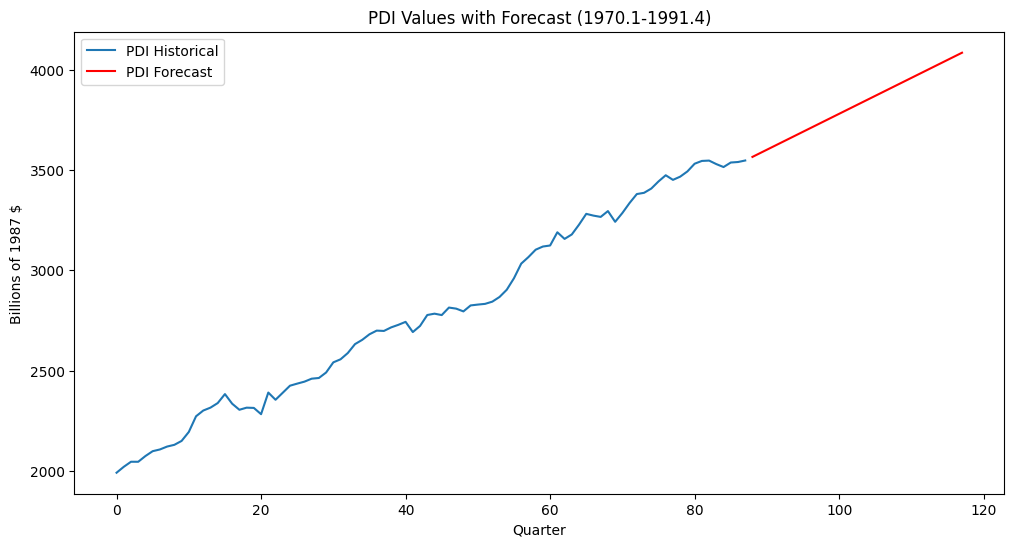

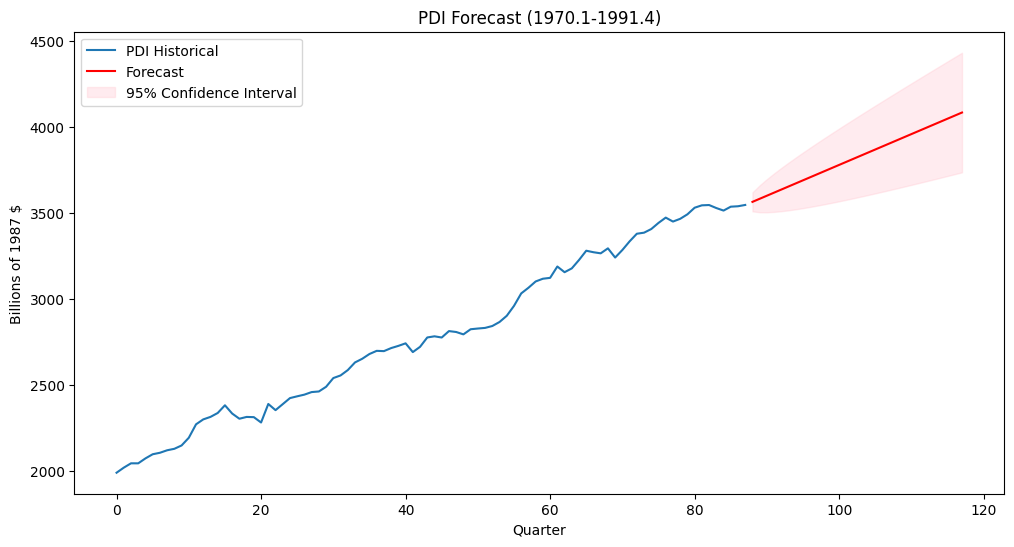


Forecast Interpretation for PDI:
Last observed value: 3547.50
Average forecast value: 3825.14
Forecast change: 277.64
Trend: Upward forecast trend

PDI Forecast Values (next 5 quarters):
88    3565.412482
89    3583.324963
90    3601.237445
91    3619.149926
92    3637.062408
Name: predicted_mean, dtype: float64


In [4]:
# -*- coding: utf-8 -*-
"""Macroeconomic Data ARIMA Analysis"""

# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Create DataFrame from the provided data
data = {
    'YEAR': ['1970.1', '1970.2', '1970.3', '1970.4', '1971.1', '1971.2', '1971.3', '1971.4',
             '1972.1', '1972.2', '1972.3', '1972.4', '1973.1', '1973.2', '1973.3', '1973.4',
             '1974.1', '1974.2', '1974.3', '1974.4', '1975.1', '1975.2', '1975.3', '1975.4',
             '1976.1', '1976.2', '1976.3', '1976.4', '1977.1', '1977.2', '1977.3', '1977.4',
             '1978.1', '1978.2', '1978.3', '1978.4', '1979.1', '1979.2', '1979.3', '1979.4',
             '1980.1', '1980.2', '1980.3', '1980.4', '1981.1', '1981.2', '1981.3', '1981.4',
             '1982.1', '1982.2', '1982.3', '1982.4', '1983.1', '1983.2', '1983.3', '1983.4',
             '1984.1', '1984.2', '1984.3', '1984.4', '1985.1', '1985.2', '1985.3', '1985.4',
             '1986.1', '1986.2', '1986.3', '1986.4', '1987.1', '1987.2', '1987.3', '1987.4',
             '1988.1', '1988.2', '1988.3', '1988.4', '1989.1', '1989.2', '1989.3', '1989.4',
             '1990.1', '1990.2', '1990.3', '1990.4', '1991.1', '1991.2', '1991.3', '1991.4'],
    'PDI': [1990.6, 2020.1, 2045.3, 2045.2, 2073.9, 2098.0, 2106.6, 2121.1, 2129.7, 2149.1,
            2193.9, 2272.0, 2300.7, 2315.2, 2337.9, 2382.7, 2334.7, 2304.5, 2315.0, 2313.7,
            2282.5, 2390.3, 2354.4, 2389.4, 2424.5, 2434.9, 2444.7, 2459.5, 2463.0, 2490.3,
            2541.0, 2556.2, 2587.3, 2631.9, 2653.2, 2680.9, 2699.2, 2697.6, 2715.3, 2728.1,
            2742.9, 2692.0, 2722.5, 2777.0, 2783.7, 2776.7, 2814.1, 2808.8, 2795.0, 2824.8,
            2829.0, 2832.6, 2843.6, 2867.0, 2903.0, 2960.6, 3033.2, 3065.9, 3102.7, 3118.5,
            3123.6, 3189.6, 3156.5, 3178.7, 3227.5, 3281.4, 3272.6, 3266.2, 3295.2, 3241.7,
            3285.7, 3335.8, 3380.1, 3386.3, 3407.5, 3443.1, 3473.9, 3450.9, 3466.9, 3493.0,
            3531.4, 3545.3, 3547.0, 3529.5, 3514.8, 3537.4, 3539.9, 3547.5]
}

df = pd.DataFrame(data)
pdi_values = df['PDI']

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(pdi_values, "PDI")

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA model
pdi_order = find_best_arima(pdi_values, "PDI")

# Fit final ARIMA model
pdi_model = ARIMA(pdi_values, order=pdi_order).fit()

# Forecast next 30 periods
forecast_steps = 30
pdi_forecast = pdi_model.forecast(steps=forecast_steps)

# Create forecast index
forecast_index = range(len(pdi_values), len(pdi_values) + forecast_steps)

# Plot original series with forecast
plt.figure(figsize=(12,6))
plt.plot(pdi_values, label='PDI Historical')
plt.plot(forecast_index, pdi_forecast, label='PDI Forecast', color='red')
plt.title('PDI Values with Forecast (1970.1-1991.4)')
plt.xlabel('Quarter')
plt.ylabel('Billions of 1987 $')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Forecast (1970.1-1991.4)')
    plt.xlabel('Quarter')
    plt.ylabel('Billions of 1987 $')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")

# Generate detailed forecast plot and interpretation
plot_forecast(pdi_model, pdi_values, "PDI")

# Print first 5 forecast values
print("\nPDI Forecast Values (next 5 quarters):")
print(pdi_forecast[:5])

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")